<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

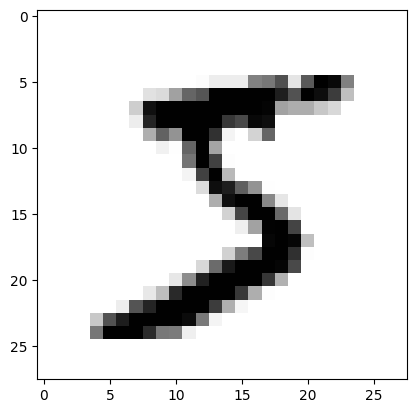

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap="gray_r")
plt.show

In [8]:
#Preparing data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /= 255

print(train_images.shape)
print(test_images.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [9]:
input_shape=(28, 28, 1)

In [10]:
#Creating network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D


model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [11]:
#Compiling model

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [12]:
history = model.fit(x=train_images,
                    y=train_labels,
                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.1774 - accuracy: 0.9468
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0650 - accuracy: 0.9799
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0252 - accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0143 - accuracy: 0.9951
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [13]:
#Evaluate

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.9858
Test loss: 0.054116230458021164
Test accuracy: 0.98580002784729


In [14]:
#Loss, Accuracy graph
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

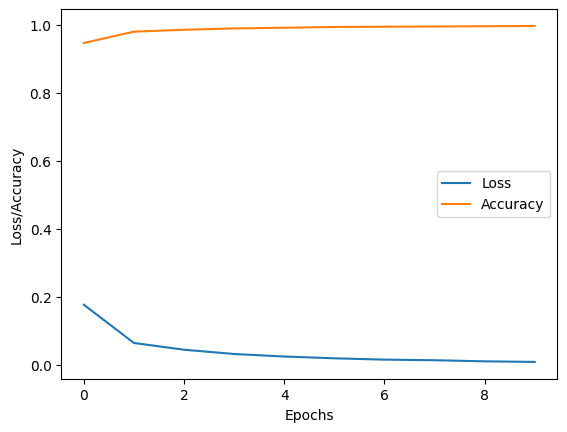

In [16]:
plt.plot(history_dict["loss"])
plt.plot(history_dict["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(["Loss", "Accuracy"])
plt.show()

In [17]:
#Save model

model.save("mnist_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 55ms/step
Predicted number: 6


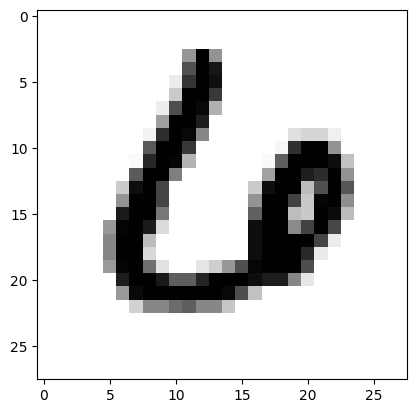

In [20]:
#Load model and prediction

from tensorflow.keras.models import load_model
import random

model = load_model("mnist_model.h5")
i = random.randint(1, 10000)
predictions = model.predict(test_images[i].reshape(1, 28, 28, 1))
print("Predicted number:",predictions.argmax())


plt.imshow(test_images[i].reshape(28, 28), cmap="gray_r")
plt.show()

